In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
manhattan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/manhattan.csv')

In [5]:
display(manhattan)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [7]:
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [13]:
X = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor']]
y = manhattan['rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [20]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on the test set
y_prediction = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("MSE:", mse)
print("R2:", r2)

#model parameters to see if we can improve the model
print("Intercept:", model.intercept_)
coeff = pd.DataFrame({'Feature':X.columns,
                      'Coefficient': model.coef_})
print(coeff)

MSE: 2716761.544472065
R2: 0.7456365107871055
Intercept: -1044.1091172950546
         Feature  Coefficient
0       bedrooms  -332.449395
1      bathrooms  1249.829146
2      size_sqft     4.896066
3  min_to_subway   -12.336057
4          floor    32.763210


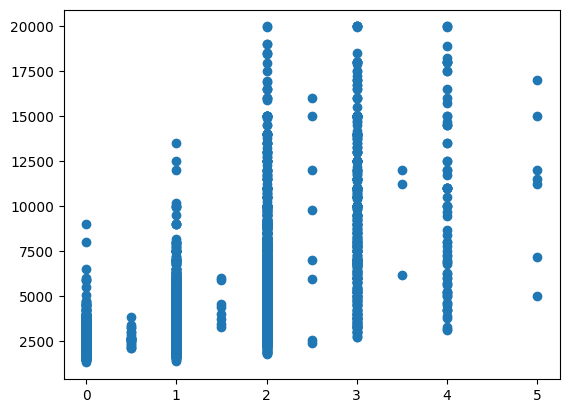

In [24]:
plt.scatter(X['bedrooms'], y)